<a href="https://colab.research.google.com/github/solanki1993/Pneumonia_prediction_using_DL/blob/main/Lungs__disease__prediction_using__DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/chest_xray/train'
valid_path = '/content/drive/MyDrive/chest_xray/test'

In [3]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [4]:
#no training existing weights

for layer in vgg.layers:
    layer.trainable = False

In [5]:
#to get number of output classes

folders = glob('/content/drive/MyDrive/chest_xray/train/*')

In [6]:
x = Flatten()(vgg.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
#using image data generator to import images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [13]:
#fitting the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
163/163 [==============================] - 1045s 6s/step - loss: 0.2523 - accuracy: 0.9016 - val_loss: 0.2484 - val_accuracy: 0.8974
Epoch 2/5
163/163 [==============================] - 140s 860ms/step - loss: 0.1088 - accuracy: 0.9597 - val_loss: 0.4481 - val_accuracy: 0.8446
Epoch 3/5
163/163 [==============================] - 140s 860ms/step - loss: 0.1099 - accuracy: 0.9559 - val_loss: 0.6270 - val_accuracy: 0.8269
Epoch 4/5
163/163 [==============================] - 138s 848ms/step - loss: 0.1141 - accuracy: 0.9569 - val_loss: 0.3268 - val_accuracy: 0.8942
Epoch 5/5
163/163 [==============================] - 140s 855ms/step - loss: 0.1206 - accuracy: 0.9530 - val_loss: 0.3425 - val_accuracy: 0.8782


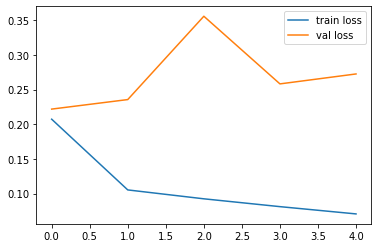

<Figure size 432x288 with 0 Axes>

In [14]:

#plotting loss for vgg16
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

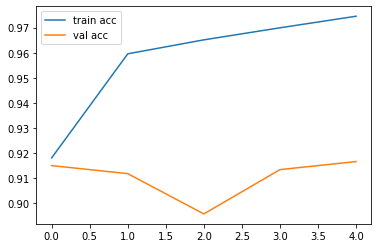

<Figure size 432x288 with 0 Axes>

In [17]:
#plotting accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [20]:
#to check if a given image has pneumonia or not

from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = load_model('model_vgg16.h5')
img= image.load_img('/content/drive/MyDrive/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg', target_size=(224,224))
x= image.img_to_array(img)
x= np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

print(classes)

[[0. 1.]]


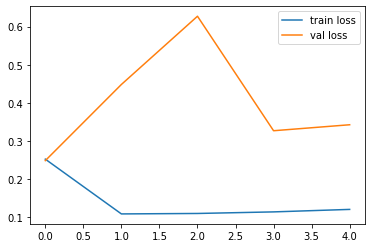

<Figure size 432x288 with 0 Axes>

In [14]:
#plotting loss for vgg19
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

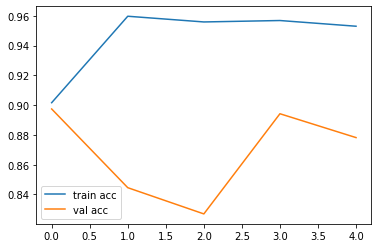

<Figure size 432x288 with 0 Axes>

In [15]:
#plotting accuracy for vgg19
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg19.h5')

In [17]:
#to check if a given image has pneumonia or not

from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = load_model('model_vgg19.h5')
img= image.load_img('/content/drive/MyDrive/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg', target_size=(224,224))
x= image.img_to_array(img)
x= np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

print(classes)

[[1.5307902e-17 1.0000000e+00]]
